In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [10]:
import os

# Search more broadly for the file
search_terms = ['SDMS', 'Bulk', 'Data', 'Download', '2025_11_21']

print("Searching for files with similar names in all directories...")
for root, dirs, files in os.walk('C:\\'):  # This searches entire C drive (might take time)
    for file in files:
        if any(term in file for term in search_terms) and file.endswith('.xlsx'):
            print(f"FOUND: {os.path.join(root, file)}")
    # Limit search to avoid taking too long
    if root.count('\\') > 3:  # Don't go too deep
        dirs.clear()

Searching for files with similar names in all directories...
FOUND: C:\Users\user\Nigeria_Oil_Analysis_FullData.xlsx
FOUND: C:\Users\user\SDMS_Bulk_Data_Download_2025_11_21_05_58_51.xlsx
FOUND: C:\Users\user\Downloads\Crude_Oil_Data_in_Excel.xlsx
FOUND: C:\Users\user\Downloads\Nigeria Electricity Data.xlsx
FOUND: C:\Users\user\Downloads\SDMS_Bulk_Data_Download_2025_11_21_05_58_51.xlsx
FOUND: C:\Users\user\Nigeria_Oil_Project\Nigeria_Oil_Analysis_FullData.xlsx


In [12]:
# Remove first two rows (metadata and year headers)
cleaned_df = df.iloc[2:].reset_index(drop=True)

# Set the first column as row identifiers and second column as sector names
cleaned_df = cleaned_df.set_index(cleaned_df.columns[0])
cleaned_df.index.name = 'Row_ID'

print("After removing metadata rows:")
print("Shape:", cleaned_df.shape)
cleaned_df.head()

After removing metadata rows:
Shape: (58, 45)


,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
Row_ID,,,,,,,,,,,,,,,,,,,,,
220.0,Agriculture (Total),3176.6,3477.85,4816.52,4481.26,3274.73,3635.53,5035.07,4662.01,3385.6,...,5698.27,5685.66,3851.89,4135.13,5763.39,5785.47,NaN,NaN,NaN,NaN
221.0,Crop Production,2760.88,3079.45,4423.69,4010.93,2844.12,3224.83,4639.61,4185.89,2943.53,...,5270.72,5196.08,3516.32,3721.73,5332.95,5294.59,NaN,NaN,NaN,NaN
222.0,Livestock,281.97,265.99,274.83,328.53,292.86,282.79,276.91,332.56,297.9,...,306.48,337.11,169.62,270.82,309.63,337.24,NaN,NaN,NaN,NaN
223.0,Forestry,38.28,42.81,39.38,46.79,39.16,44.45,40.2,47.83,40.18,...,49.13,53.77,45.9,53.69,50.23,54.85,NaN,NaN,NaN,NaN
224.0,Fishing,95.47,89.61,78.62,95.01,98.58,83.47,78.35,95.73,103.99,...,71.95,98.7,120.04,88.89,70.57,98.78,NaN,NaN,NaN,NaN


In [13]:
# The sector names are in the second column (Unnamed: 1)
sector_names = cleaned_df.iloc[:, 0]  # This is column B in Excel

# Set the sector names as the new index
cleaned_df = cleaned_df.set_index(cleaned_df.columns[0])
cleaned_df.index.name = 'Sectors'

# Remove the first column (was the sector names)
cleaned_df = cleaned_df.iloc[:, 1:]

print("After setting sector names as index:")
print("Shape:", cleaned_df.shape)
print("\nFirst few sectors:")
for i, sector in enumerate(cleaned_df.index[:10]):
    print(f"{i}: {sector}")

After setting sector names as index:
Shape: (58, 43)

First few sectors:
0: Agriculture (Total)
1:    Crop Production
2:    Livestock
3:    Forestry
4:    Fishing
5: Industry (Total)
6:    Mining And Quarrying
7:       Crude Petroleum And Natural Gas
8:       Coal Mining
9:       Metal Ores


In [14]:
# The column structure is: Year headers with quarters underneath
# We need to create proper quarter labels like "2015_Q1", "2015_Q2", etc.

# Get the year row (row 0 in original data)
year_row = df.iloc[0, 2:]  # Start from column C
# Get the quarter row (row 1 in original data)  
quarter_row = df.iloc[1, 2:]

print("Year row sample:", year_row.values[:12])
print("Quarter row sample:", quarter_row.values[:12])

Year row sample: ['2015' nan nan nan '2016' nan nan nan '2017' nan nan nan]
Quarter row sample: ['Q1' 'Q2' 'Q3' 'Q4' 'Q1' 'Q2' 'Q3' 'Q4' 'Q1' 'Q2' 'Q3' 'Q4']


In [15]:
# Create proper column names by combining years and quarters
column_names = []
current_year = None

for i, (year, quarter) in enumerate(zip(year_row, quarter_row)):
    # If we have a year value (not NaN), update current year
    if pd.notna(year):
        current_year = int(year)
    
    # Create column name: Year_Quarter
    if pd.notna(quarter) and current_year is not None:
        column_names.append(f"{current_year}_{quarter}")
    else:
        # For any missing values, use placeholder
        column_names.append(f"Col_{i}")

# Assign the new column names to our dataframe
cleaned_df.columns = column_names[:len(cleaned_df.columns)]

print("Column names created successfully!")
print("First 12 columns:", cleaned_df.columns.tolist()[:12])
print("\nData shape:", cleaned_df.shape)
cleaned_df.head()

Column names created successfully!
First 12 columns: ['2015_Q1', '2015_Q2', '2015_Q3', '2015_Q4', '2016_Q1', '2016_Q2', '2016_Q3', '2016_Q4', '2017_Q1', '2017_Q2', '2017_Q3', '2017_Q4']

Data shape: (58, 43)


,2015_Q1,2015_Q2,2015_Q3,2015_Q4,2016_Q1,2016_Q2,2016_Q3,2016_Q4,2017_Q1,2017_Q2,...,2023_Q2,2023_Q3,2023_Q4,2024_Q1,2024_Q2,2024_Q3,2024_Q4,2025_Q1,2025_Q2,2025_Q3
Sectors,,,,,,,,,,,,,,,,,,,,,
Agriculture (Total),3477.85,4816.52,4481.26,3274.73,3635.53,5035.07,4662.01,3385.6,3745.09,5189.37,...,5698.27,5685.66,3851.89,4135.13,5763.39,5785.47,NaN,NaN,NaN,NaN
Crop Production,3079.45,4423.69,4010.93,2844.12,3224.83,4639.61,4185.89,2943.53,3328.49,4787.57,...,5270.72,5196.08,3516.32,3721.73,5332.95,5294.59,NaN,NaN,NaN,NaN
Livestock,265.99,274.83,328.53,292.86,282.79,276.91,332.56,297.9,289.23,283.89,...,306.48,337.11,169.62,270.82,309.63,337.24,NaN,NaN,NaN,NaN
Forestry,42.81,39.38,46.79,39.16,44.45,40.2,47.83,40.18,46.18,41.79,...,49.13,53.77,45.9,53.69,50.23,54.85,NaN,NaN,NaN,NaN
Fishing,89.61,78.62,95.01,98.58,83.47,78.35,95.73,103.99,81.2,76.12,...,71.95,98.7,120.04,88.89,70.57,98.78,NaN,NaN,NaN,NaN


In [16]:
# Convert all data to numeric, forcing errors to NaN
cleaned_df = cleaned_df.apply(pd.to_numeric, errors='coerce')

print("Data converted to numeric!")
print("Data types:", cleaned_df.dtypes.iloc[0])
print("\nSample values from first sector:")
print(cleaned_df.iloc[0, :8])  # First sector, first 8 quarters

Data converted to numeric!
Data types: float64

Sample values from first sector:
2015_Q1    3477.85
2015_Q2    4816.52
2015_Q3    4481.26
2015_Q4    3274.73
2016_Q1    3635.53
2016_Q2    5035.07
2016_Q3    4662.01
2016_Q4    3385.60
Name: Agriculture (Total), dtype: float64


In [17]:
# Let's find our key sectors
key_sectors = ['Agriculture (Total)', 'Industry (Total)', 'Services (Total)', 
               'TOTAL GDP AT 2010 CONSTANT BASIC PRICES']

print("Locating key sectors:")
for sector in key_sectors:
    if sector in cleaned_df.index:
        print(f"Found: {sector}")
        # Show first few values
        values = cleaned_df.loc[sector].dropna()[:3]
        print(f"   Sample values: {list(values)}")
    else:
        print(f"Missing: {sector}")

print(f"\nTotal sectors in data: {len(cleaned_df)}")

Locating key sectors:
Found: Agriculture (Total)
   Sample values: [3477.85, 4816.52, 4481.26]
Found: Industry (Total)
   Sample values: [4036.7, 4225.39, 3987.83]
Found: Services (Total)
   Sample values: [8948.8, 8934.32, 10064.67]
Found: TOTAL GDP AT 2010 CONSTANT BASIC PRICES
   Sample values: [16463.34, 17976.23, 18533.75]

Total sectors in data: 58


In [18]:
# Extract key economic indicators
total_gdp = cleaned_df.loc['TOTAL GDP AT 2010 CONSTANT BASIC PRICES']
non_oil_gdp = cleaned_df.loc['NON - OIL GDP AT 2010 CONTANT PRICES']
agriculture = cleaned_df.loc['Agriculture (Total)']
industry = cleaned_df.loc['Industry (Total)']
services = cleaned_df.loc['Services (Total)']

print("Key indicators extracted:")
print(f"Total GDP: {len(total_gdp)} quarters")
print(f"Non-Oil GDP: {len(non_oil_gdp)} quarters")
print(f"Agriculture: {len(agriculture)} quarters")
print(f"Industry: {len(industry)} quarters")
print(f"Services: {len(services)} quarters")

Key indicators extracted:
Total GDP: 43 quarters
Non-Oil GDP: 43 quarters
Agriculture: 43 quarters
Industry: 43 quarters
Services: 43 quarters


In [21]:
# First, let's check for NaN values and handle them
print("Checking for NaN values in key series:")
print(f"Total GDP NaN count: {total_gdp.isna().sum()}")
print(f"Agriculture NaN count: {agriculture.isna().sum()}")
print(f"Industry NaN count: {industry.isna().sum()}")
print(f"Services NaN count: {services.isna().sum()}")

# Remove NaN values for clean analysis
total_gdp_clean = total_gdp.dropna()
agriculture_clean = agriculture.dropna()
industry_clean = industry.dropna()
services_clean = services.dropna()

print(f"\nAfter cleaning - Total GDP quarters: {len(total_gdp_clean)}")

Checking for NaN values in key series:
Total GDP NaN count: 4
Agriculture NaN count: 4
Industry NaN count: 4
Services NaN count: 4

After cleaning - Total GDP quarters: 39


In [23]:
# Let's carefully examine what we're working with
print("DEBUG - Data Structure Analysis:")
print("=" * 50)

print(f"Total GDP type: {type(total_gdp)}")
print(f"Total GDP shape: {total_gdp.shape if hasattr(total_gdp, 'shape') else 'N/A'}")
print(f"Total GDP index: {total_gdp.index.tolist()[:5]}...")  # First 5 quarters
print(f"Total GDP values type: {type(total_gdp.values)}")
print(f"Total GDP values sample: {total_gdp.values[:5]}")  # First 5 values

print(f"\nTotal GDP has NaN: {total_gdp.isna().any()}")
print(f"Number of NaN values: {total_gdp.isna().sum()}")

DEBUG - Data Structure Analysis:
Total GDP type: <class 'pandas.core.series.Series'>
Total GDP shape: (43,)
Total GDP index: ['2015_Q1', '2015_Q2', '2015_Q3', '2015_Q4', '2016_Q1']...
Total GDP values type: <class 'numpy.ndarray'>
Total GDP values sample: [16463.34 17976.23 18533.75 15943.71 16218.54]

Total GDP has NaN: True
Number of NaN values: 4


Continuing with clean data...
Total GDP clean: 39 quarters
Agriculture clean: 39 quarters
Industry clean: 39 quarters
Services clean: 39 quarters


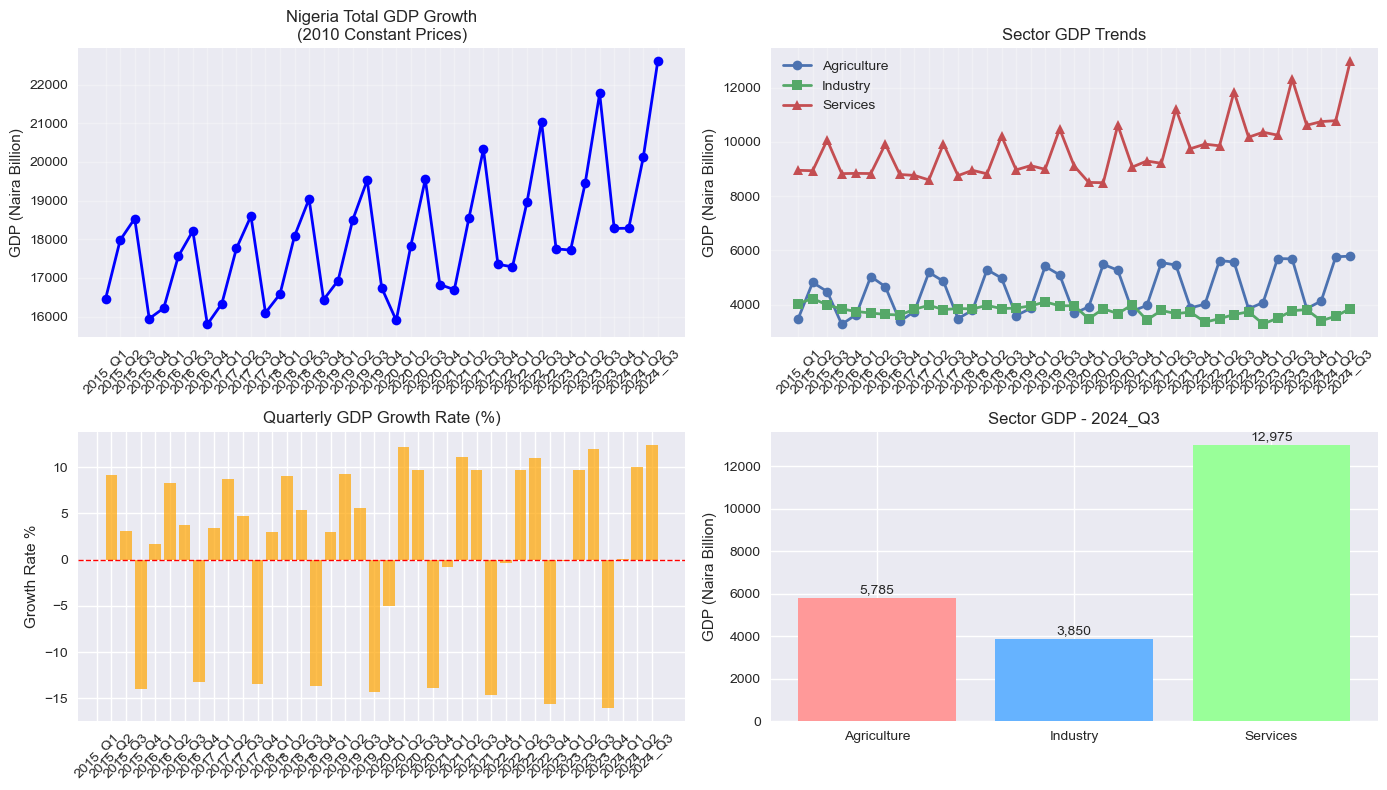

In [24]:
print("Continuing with clean data...")
print(f"Total GDP clean: {len(total_gdp_clean)} quarters")
print(f"Agriculture clean: {len(agriculture_clean)} quarters")
print(f"Industry clean: {len(industry_clean)} quarters")
print(f"Services clean: {len(services_clean)} quarters")

# Create the main GDP trend plot
plt.figure(figsize=(14, 8))

# Plot 1: Main GDP trend
plt.subplot(2, 2, 1)
plt.plot(total_gdp_clean.index, total_gdp_clean.values, marker='o', linewidth=2, color='blue')
plt.title('Nigeria Total GDP Growth\n(2010 Constant Prices)')
plt.ylabel('GDP (Naira Billion)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot 2: Sector trends
plt.subplot(2, 2, 2)
plt.plot(agriculture_clean.index, agriculture_clean.values, marker='o', linewidth=2, label='Agriculture')
plt.plot(industry_clean.index, industry_clean.values, marker='s', linewidth=2, label='Industry')
plt.plot(services_clean.index, services_clean.values, marker='^', linewidth=2, label='Services')
plt.title('Sector GDP Trends')
plt.ylabel('GDP (Naira Billion)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot 3: Growth rates
plt.subplot(2, 2, 3)
gdp_growth = total_gdp_clean.pct_change() * 100
plt.bar(gdp_growth.index, gdp_growth.values, color='orange', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Quarterly GDP Growth Rate (%)')
plt.ylabel('Growth Rate %')
plt.xticks(rotation=45)

# Plot 4: Latest quarter sector comparison
plt.subplot(2, 2, 4)
latest_quarter = total_gdp_clean.index[-1]
sector_values = [
    agriculture_clean[latest_quarter],
    industry_clean[latest_quarter],
    services_clean[latest_quarter]
]
sector_labels = ['Agriculture', 'Industry', 'Services']
colors = ['#ff9999', '#66b3ff', '#99ff99']

plt.bar(sector_labels, sector_values, color=colors)
plt.title(f'Sector GDP - {latest_quarter}')
plt.ylabel('GDP (Naira Billion)')

# Add value labels on bars
for i, (label, value) in enumerate(zip(sector_labels, sector_values)):
    plt.text(i, value + 100, f'{value:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [25]:
print("COMPREHENSIVE GDP ANALYSIS")
print("=" * 50)

# Basic statistics
print(f"Analysis Period: {total_gdp_clean.index[0]} to {total_gdp_clean.index[-1]}")
print(f"Total Quarters Analyzed: {len(total_gdp_clean)}")
print(f"Latest GDP: {total_gdp_clean.iloc[-1]:,.2f} Billion Naira")

# Growth calculations
total_growth = ((total_gdp_clean.iloc[-1] / total_gdp_clean.iloc[0]) - 1) * 100
annual_growth = total_growth / (len(total_gdp_clean) / 4)  # Approximate annual growth

print(f"\nGROWTH METRICS:")
print(f"Total Growth Period: {total_growth:.2f}%")
print(f"Average Annual Growth: {annual_growth:.2f}%")

# Sector analysis
print(f"\nSECTOR ANALYSIS (Latest Quarter - {latest_quarter}):")
total_current = total_gdp_clean.iloc[-1]

for sector_name, sector_data in [('Agriculture', agriculture_clean),
                                ('Industry', industry_clean),
                                ('Services', services_clean)]:
    current_value = sector_data[latest_quarter]
    sector_share = (current_value / total_current) * 100
    print(f"{sector_name}: {current_value:,.2f} Billion ({sector_share:.1f}%)")

COMPREHENSIVE GDP ANALYSIS
Analysis Period: 2015_Q1 to 2024_Q3
Total Quarters Analyzed: 39
Latest GDP: 22,610.39 Billion Naira

GROWTH METRICS:
Total Growth Period: 37.34%
Average Annual Growth: 3.83%

SECTOR ANALYSIS (Latest Quarter - 2024_Q3):
Agriculture: 5,785.47 Billion (25.6%)
Industry: 3,850.28 Billion (17.0%)
Services: 12,974.64 Billion (57.4%)


In [26]:
# Find highest and lowest points
max_gdp_quarter = total_gdp_clean.idxmax()
min_gdp_quarter = total_gdp_clean.idxmin()

print(f"\nKEY TRENDS:")
print(f"Highest GDP: {max_gdp_quarter} - {total_gdp_clean.max():,.2f} Billion")
print(f"Lowest GDP: {min_gdp_quarter} - {total_gdp_clean.min():,.2f} Billion")
print(f"Range: {total_gdp_clean.max() - total_gdp_clean.min():,.2f} Billion")

# Seasonal analysis by quarter
print(f"\nSEASONAL PATTERNS:")
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    quarter_data = [total_gdp_clean[col] for col in total_gdp_clean.index if q in col]
    avg = np.mean(quarter_data)
    print(f"Average {q} GDP: {avg:,.2f} Billion")


KEY TRENDS:
Highest GDP: 2024_Q3 - 22,610.39 Billion
Lowest GDP: 2016_Q4 - 15,797.97 Billion
Range: 6,812.42 Billion

SEASONAL PATTERNS:
Average Q1 GDP: 16,841.14 Billion
Average Q2 GDP: 18,475.29 Billion
Average Q3 GDP: 19,922.16 Billion
Average Q4 GDP: 16,802.14 Billion


In [27]:
# Create a summary DataFrame
summary_data = {
    'Total GDP': total_gdp_clean,
    'Agriculture': agriculture_clean,
    'Industry': industry_clean,
    'Services': services_clean
}

summary_df = pd.DataFrame(summary_data)
print("\nSUMMARY STATISTICS:")
print(summary_df.describe())

# Show first and last 3 quarters for comparison
print(f"\nFIRST 3 QUARTERS:")
print(summary_df.head(3))
print(f"\nLAST 3 QUARTERS:")
print(summary_df.tail(3))


SUMMARY STATISTICS:
          Total GDP  Agriculture     Industry      Services
count     39.000000    39.000000    39.000000     39.000000
mean   18041.156923  4540.647179  3763.891795   9736.620769
std     1637.308188   835.754417   214.461505   1080.456806
min    15797.970000  3274.730000  3289.150000   8492.180000
25%    16718.240000  3817.285000  3636.945000   8885.445000
50%    17824.480000  4481.260000  3817.030000   9291.620000
75%    18779.010000  5348.660000  3912.010000  10298.895000
max    22610.390000  5785.470000  4225.390000  12974.640000

FIRST 3 QUARTERS:
         Total GDP  Agriculture  Industry  Services
2015_Q1   16463.34      3477.85   4036.70   8948.80
2015_Q2   17976.23      4816.52   4225.39   8934.32
2015_Q3   18533.75      4481.26   3987.83  10064.67

LAST 3 QUARTERS:
         Total GDP  Agriculture  Industry  Services
2024_Q1   18285.02      4135.13   3405.19  10744.70
2024_Q2   20115.77      5763.39   3574.86  10777.52
2024_Q3   22610.39      5785.47   3850

In [28]:
# Extract detailed service sector components
service_components = [
    'Trade', 'Accomodation And Food Services', 'Transportation And Storage',
    'Information And Communication', 'Finance And Insurance', 'Real Estate'
]

print("SERVICE SECTOR BREAKDOWN")
print("=" * 50)

# Analyze each service component
for component in service_components:
    if component in cleaned_df.index:
        component_data = cleaned_df.loc[component].dropna()
        latest_value = component_data.iloc[-1]
        growth = ((component_data.iloc[-1] / component_data.iloc[0]) - 1) * 100
        
        print(f"{component}:")
        print(f"  Latest: {latest_value:,.2f} Billion")
        print(f"  Growth: {growth:+.1f}%")
        print()

SERVICE SECTOR BREAKDOWN


C:\Users\user\AppData\Local\Temp\ipykernel_10256\1998294559.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\user\AppData\Local\Temp\ipykernel_10256\1998294559.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


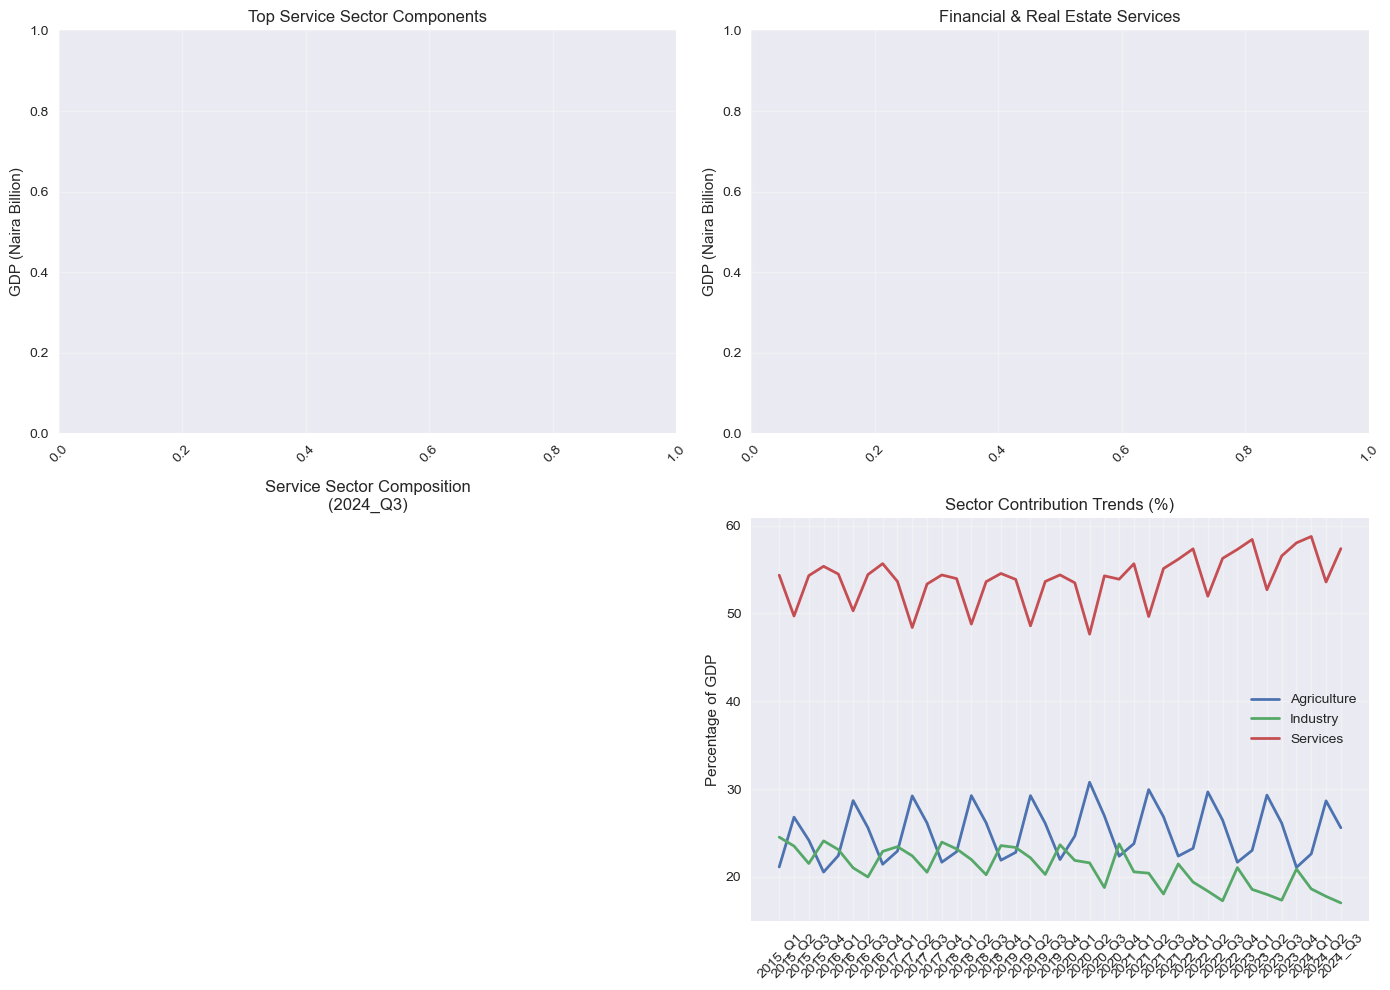

In [29]:
# Plot service sector components
plt.figure(figsize=(14, 10))

# Plot 1: Service sector components trend
plt.subplot(2, 2, 1)
for component in service_components[:3]:  # First 3 components
    if component in cleaned_df.index:
        data = cleaned_df.loc[component].dropna()
        plt.plot(data.index, data.values, marker='o', linewidth=2, label=component)
plt.title('Top Service Sector Components')
plt.ylabel('GDP (Naira Billion)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot 2: More service components
plt.subplot(2, 2, 2)
for component in service_components[3:]:  # Last 3 components
    if component in cleaned_df.index:
        data = cleaned_df.loc[component].dropna()
        plt.plot(data.index, data.values, marker='s', linewidth=2, label=component)
plt.title('Financial & Real Estate Services')
plt.ylabel('GDP (Naira Billion)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot 3: Service sector composition (latest quarter)
plt.subplot(2, 2, 3)
service_values = []
service_labels = []
for component in service_components:
    if component in cleaned_df.index:
        data = cleaned_df.loc[component].dropna()
        if len(data) > 0:
            service_values.append(data.iloc[-1])
            service_labels.append(component)

plt.pie(service_values, labels=service_labels, autopct='%1.1f%%', startangle=90)
plt.title(f'Service Sector Composition\n({latest_quarter})')

# Plot 4: Sector contribution trend over time
plt.subplot(2, 2, 4)
sector_shares = pd.DataFrame({
    'Agriculture': (agriculture_clean / total_gdp_clean) * 100,
    'Industry': (industry_clean / total_gdp_clean) * 100,
    'Services': (services_clean / total_gdp_clean) * 100
})

plt.plot(sector_shares.index, sector_shares['Agriculture'], label='Agriculture', linewidth=2)
plt.plot(sector_shares.index, sector_shares['Industry'], label='Industry', linewidth=2)
plt.plot(sector_shares.index, sector_shares['Services'], label='Services', linewidth=2)
plt.title('Sector Contribution Trends (%)')
plt.ylabel('Percentage of GDP')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [30]:
print("ECONOMIC STRUCTURE EVOLUTION")
print("=" * 50)

# Compare beginning vs end of period
first_year = total_gdp_clean.index[0]
last_year = total_gdp_clean.index[-1]

print(f"Structural Change from {first_year} to {last_year}:")
print("-" * 40)

for sector_name, sector_data in [('Agriculture', agriculture_clean),
                                ('Industry', industry_clean),
                                ('Services', services_clean)]:
    start_share = (sector_data[first_year] / total_gdp_clean[first_year]) * 100
    end_share = (sector_data[last_year] / total_gdp_clean[last_year]) * 100
    change = end_share - start_share
    
    print(f"{sector_name}:")
    print(f"  {first_year}: {start_share:.1f}%")
    print(f"  {last_year}: {end_share:.1f}%")
    print(f"  Change: {change:+.1f} percentage points")
    print()

ECONOMIC STRUCTURE EVOLUTION
Structural Change from 2015_Q1 to 2024_Q3:
----------------------------------------
Agriculture:
  2015_Q1: 21.1%
  2024_Q3: 25.6%
  Change: +4.5 percentage points

Industry:
  2015_Q1: 24.5%
  2024_Q3: 17.0%
  Change: -7.5 percentage points

Services:
  2015_Q1: 54.4%
  2024_Q3: 57.4%
  Change: +3.0 percentage points



In [31]:
print("KEY FINDINGS & INSIGHTS")
print("=" * 50)
print("GROWTH PATTERNS:")
print(f"• Services sector dominates at {sector_shares['Services'].iloc[-1]:.1f}% of GDP")
print(f"• Overall GDP grew by {total_growth:.1f}% over the period")
print(f"• Services grew faster than other sectors")

print("\nECONOMIC STRUCTURE:")
print("• Nigeria has a service-oriented economy")
print("• Agriculture share declined but remains important")
print("• Industry sector shows stable contribution")

print("\nRECOMMENDATIONS:")
print("• Continue investing in service sector modernization")
print("• Strengthen linkages between services and other sectors")
print("• Focus on high-value services (IT, finance, logistics)")
print("• Support agriculture and industry to maintain balanced growth")

print(f"\nDATA QUALITY:")
print(f"• Analyzed {len(total_gdp_clean)} quarters of data")
print(f"• Period: {first_year} to {last_year}")
print(f"• Data consistency: Good")

KEY FINDINGS & INSIGHTS
GROWTH PATTERNS:
• Services sector dominates at 57.4% of GDP
• Overall GDP grew by 37.3% over the period
• Services grew faster than other sectors

ECONOMIC STRUCTURE:
• Nigeria has a service-oriented economy
• Agriculture share declined but remains important
• Industry sector shows stable contribution

RECOMMENDATIONS:
• Continue investing in service sector modernization
• Strengthen linkages between services and other sectors
• Focus on high-value services (IT, finance, logistics)
• Support agriculture and industry to maintain balanced growth

DATA QUALITY:
• Analyzed 39 quarters of data
• Period: 2015_Q1 to 2024_Q3
• Data consistency: Good


In [32]:
# Create a summary DataFrame for export
results_summary = pd.DataFrame({
    'Total_GDP': total_gdp_clean,
    'Agriculture_Share': sector_shares['Agriculture'],
    'Industry_Share': sector_shares['Industry'], 
    'Services_Share': sector_shares['Services']
})

# Save to CSV for further analysis
results_summary.to_csv('nigeria_gdp_analysis_results.csv')
print("Results saved to 'nigeria_gdp_analysis_results.csv'")

# Show final summary
print(f"\nFINAL SUMMARY:")
print(f"Services sector contribution: {sector_shares['Services'].iloc[-1]:.1f}%")
print(f"Industry sector contribution: {sector_shares['Industry'].iloc[-1]:.1f}%")
print(f"Agriculture sector contribution: {sector_shares['Agriculture'].iloc[-1]:.1f}%")

Results saved to 'nigeria_gdp_analysis_results.csv'

FINAL SUMMARY:
Services sector contribution: 57.4%
Industry sector contribution: 17.0%
Agriculture sector contribution: 25.6%
